In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf
import math
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
#nifty = pdr.get_data_tiingo("INDF", api_key = "30f0d443a2a115c661a899929861dccfa07e7478" )
df = yf.download('^NSEI',start="2011-01-31", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-23 00:00:00+05:30,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900
2015-12-24 00:00:00+05:30,7888.750000,7888.750000,7835.500000,7861.049805,7861.049805,93500
2015-12-28 00:00:00+05:30,7863.200195,7937.200195,7863.000000,7925.149902,7925.149902,122900
2015-12-29 00:00:00+05:30,7929.200195,7942.149902,7902.750000,7928.950195,7928.950195,113000
2015-12-30 00:00:00+05:30,7938.600098,7944.750000,7889.850098,7896.250000,7896.250000,106800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1195 entries, 2011-01-31 00:00:00+05:30 to 2015-12-30 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1195 non-null   float64
 1   High       1195 non-null   float64
 2   Low        1195 non-null   float64
 3   Close      1195 non-null   float64
 4   Adj Close  1195 non-null   float64
 5   Volume     1195 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 65.4 KB


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-31 00:00:00+05:30,5452.549805,5526.850098,5416.649902,5505.899902,5505.899902,0
2011-02-01 00:00:00+05:30,5537.299805,5539.149902,5402.000000,5417.200195,5417.200195,0
2011-02-02 00:00:00+05:30,5469.549805,5490.600098,5415.649902,5432.000000,5432.000000,0
2011-02-03 00:00:00+05:30,5430.450195,5532.649902,5418.000000,5526.750000,5526.750000,0
2011-02-04 00:00:00+05:30,5519.899902,5556.299805,5369.049805,5395.750000,5395.750000,0
...,...,...,...,...,...,...
2015-12-23 00:00:00+05:30,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900
2015-12-24 00:00:00+05:30,7888.750000,7888.750000,7835.500000,7861.049805,7861.049805,93500
2015-12-28 00:00:00+05:30,7863.200195,7937.200195,7863.000000,7925.149902,7925.149902,122900


In [6]:
df["Return"] = df["Adj Close"].pct_change()

In [7]:
df1 = df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

In [8]:
df1

,Close,Return
Date,,
2011-01-31 00:00:00+05:30,5505.899902,NaN
2011-02-01 00:00:00+05:30,5417.200195,-0.016110
2011-02-02 00:00:00+05:30,5432.000000,0.002732
2011-02-03 00:00:00+05:30,5526.750000,0.017443
2011-02-04 00:00:00+05:30,5395.750000,-0.023703
...,...,...
2015-12-23 00:00:00+05:30,7865.950195,0.010255
2015-12-24 00:00:00+05:30,7861.049805,-0.000623
2015-12-28 00:00:00+05:30,7925.149902,0.008154


In [9]:
df1["Log_Return"] = np.log(1+df1["Return"])

In [10]:
df1 = df1.dropna()

In [11]:
df2 = df1["Log_Return"]

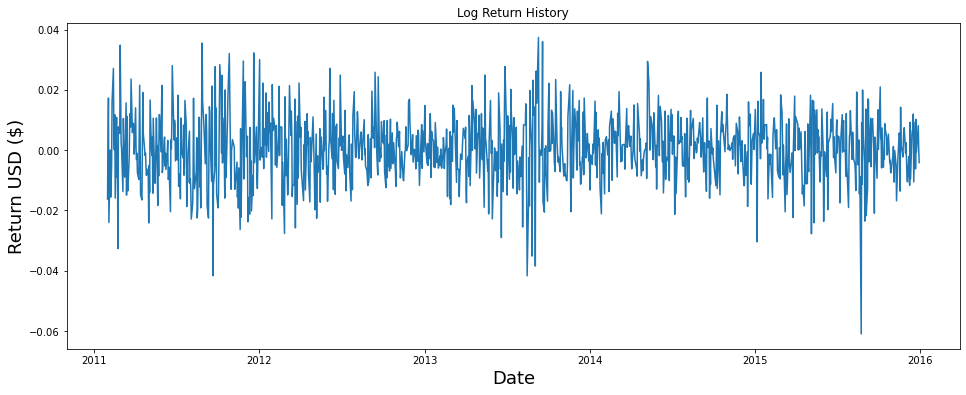

In [12]:
plt.figure(figsize=(16,6))
plt.title('Log Return History')
plt.plot(df2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [14]:
df3

array([[-1.54293528],
       [ 0.2262947 ],
       [ 1.58466965],
       ...,
       [ 0.72926803],
       [ 0.01654803],
       [-0.41361044]])

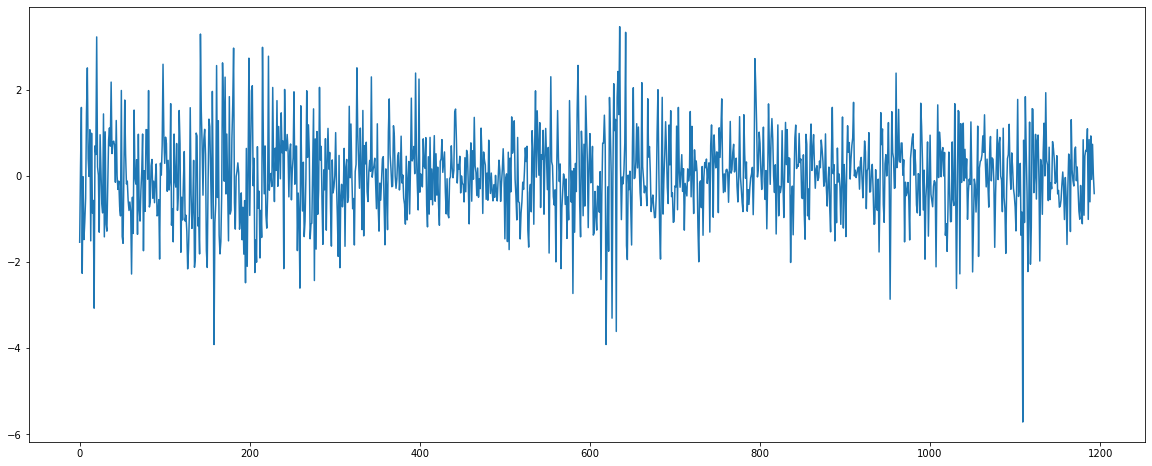

In [15]:
plt.figure(figsize = (20,8))
plt.plot(df3)

In [16]:
train_size = int(len(df3)*0.8)
test_size = len(df3)-train_size
train_size,test_size

(955, 239)

In [17]:
train_data,test_data = df3[0:train_size],df3[train_size:]

In [18]:
train_data.shape,test_data.shape

((955, 1), (239, 1))

In [19]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [20]:
x_train, y_train = creat_dataset(train_data,50)
x_test, y_test = creat_dataset(test_data,50)

In [21]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[-1.54293528,  0.2262947 ,  1.58466965, ..., -0.72324304,
         -0.93135155,  1.97804147],
        [ 0.2262947 ,  1.58466965, -2.26549993, ..., -0.93135155,
          1.97804147, -1.41019518],
        [ 1.58466965, -2.26549993, -0.02384399, ...,  1.97804147,
         -1.41019518, -1.56924872],
        ...,
        [-1.41177166,  0.35024188,  1.15949944, ...,  0.48900846,
         -0.00611067,  0.36057132],
        [ 0.35024188,  1.15949944,  0.54240094, ..., -0.00611067,
          0.36057132,  1.23289598],
        [ 1.15949944,  0.54240094,  0.77017158, ...,  0.36057132,
          1.23289598, -0.21776932]]),
 array([[ 1.48477009,  0.53531642,  0.40426707, ..., -0.58010836,
         -0.7193187 , -0.24605742],
        [ 0.53531642,  0.40426707, -0.29299833, ..., -0.7193187 ,
         -0.24605742, -0.1149211 ],
        [ 0.40426707, -0.29299833, -0.27404319, ..., -0.24605742,
         -0.1149211 , -0.1609115 ],
        ...,
        [ 0.66167094, -0.55465501, -0.16455298, ...,  

In [22]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.176568,0.025896,0.181344,-0.259256,-0.002729,-0.169576,-0.122421,-0.059750,0.167377,0.286278,...,0.091802,0.081455,-0.017320,0.146675,-0.000334,-0.036323,-0.014188,-0.082765,-0.106581,0.226360
1,0.025963,0.181811,-0.259924,-0.002736,-0.170013,-0.122736,-0.059904,0.167809,0.287016,0.045688,...,0.081665,-0.017365,0.147053,-0.000335,-0.036416,-0.014225,-0.082979,-0.106855,0.226943,-0.161794
2,0.178993,-0.255894,-0.002693,-0.167378,-0.120833,-0.058975,0.165207,0.282566,0.044980,-0.001836,...,-0.017096,0.144774,-0.000330,-0.035852,-0.014004,-0.081692,-0.105199,0.223425,-0.159285,-0.177251
3,-0.260050,-0.002737,-0.170096,-0.122796,-0.059933,0.167890,0.287155,0.045711,-0.001865,0.122485,...,0.147125,-0.000335,-0.036434,-0.014232,-0.083019,-0.106907,0.227054,-0.161872,-0.180130,0.018515
4,-0.002775,-0.172438,-0.124486,-0.060758,0.170202,0.291109,0.046340,-0.001891,0.124171,-0.175863,...,-0.000340,-0.036936,-0.014428,-0.084162,-0.108379,0.230180,-0.164101,-0.182610,0.018770,0.204388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,0.051474,-0.053116,-0.279782,0.069410,0.229788,0.107492,0.152631,-0.015292,0.077263,0.138568,...,-0.015698,-0.350587,-0.092389,0.290133,0.143106,0.215118,-0.132587,-0.214466,0.054470,0.096911
900,-0.053187,-0.280154,0.069502,0.230092,0.107635,0.152834,-0.015313,0.077366,0.138751,0.173692,...,-0.351052,-0.092512,0.290518,0.143295,0.215403,-0.132763,-0.214751,0.054542,0.097039,-0.001213
901,-0.279833,0.069423,0.229829,0.107512,0.152659,-0.015295,0.077277,0.138593,0.173494,0.337455,...,-0.092406,0.290186,0.143132,0.215157,-0.132611,-0.214505,0.054480,0.096928,-0.001211,0.071470
902,0.070077,0.231995,0.108525,0.154098,-0.015439,0.078006,0.139899,0.175129,0.340636,-0.001263,...,0.292921,0.144481,0.217184,-0.133861,-0.216527,0.054993,0.097842,-0.001223,0.072144,0.246681


<AxesSubplot:>

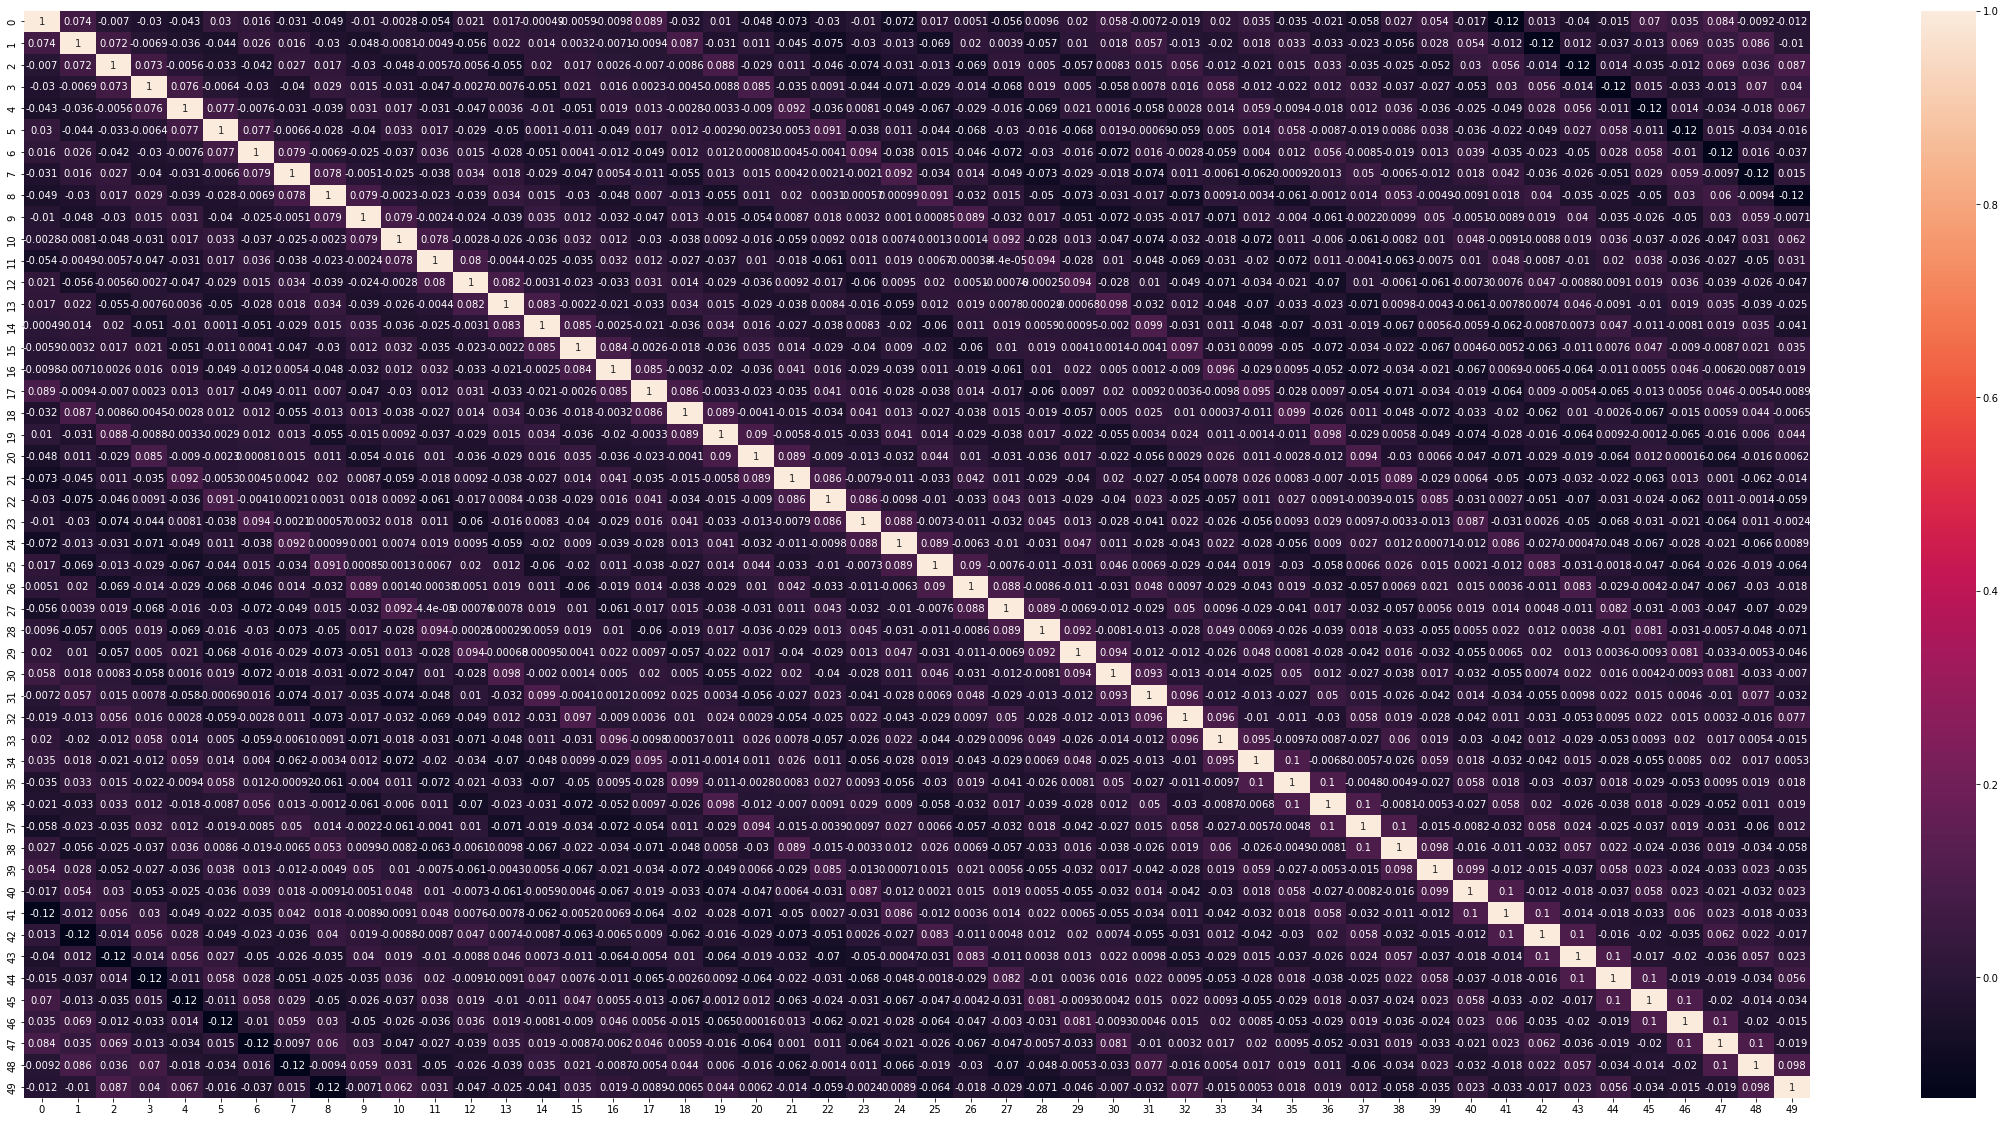

In [23]:
# plot correlation heatmap
plt.figure(figsize = (40,20))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [24]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [25]:
x_train.shape, x_test.shape

((904, 50, 1), (188, 50, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences = True, input_shape = (50,1)))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 50, batch_size = 9, verbose = 1)

Epoch 1/50
101/101 [==============================] - 22s 137ms/step - loss: 1.0028 - val_loss: 0.9611
Epoch 2/50
101/101 [==============================] - 10s 100ms/step - loss: 0.9975 - val_loss: 0.9701
Epoch 3/50
101/101 [==============================] - 8s 81ms/step - loss: 0.9987 - val_loss: 0.9623
Epoch 4/50
101/101 [==============================] - 10s 95ms/step - loss: 0.9976 - val_loss: 0.9610
Epoch 5/50
101/101 [==============================] - 10s 102ms/step - loss: 0.9995 - val_loss: 0.9634
Epoch 6/50
101/101 [==============================] - 7s 73ms/step - loss: 0.9971 - val_loss: 0.9644
Epoch 7/50
101/101 [==============================] - 9s 90ms/step - loss: 0.9969 - val_loss: 0.9642
Epoch 8/50
101/101 [==============================] - 8s 82ms/step - loss: 0.9965 - val_loss: 0.9603
Epoch 9/50
101/101 [==============================] - 9s 84ms/step - loss: 0.9977 - val_loss: 0.9624
Epoch 10/50
101/101 [==============================] - 8s 75ms/step - loss: 0.9971 -

In [30]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)
train_pred, test_pred

6/6 [==============================] - 1s 56ms/step


(array([[-0.02717285],
        [-0.03028882],
        [-0.0349629 ],
        [-0.04011979],
        [-0.04395911],
        [-0.04767586],
        [-0.05074985],
        [-0.05374718],
        [-0.05704566],
        [-0.06098032],
        [-0.06477825],
        [-0.06799728],
        [-0.06964996],
        [-0.06860528],
        [-0.06277276],
        [-0.0566534 ],
        [-0.04796864],
        [-0.03871961],
        [-0.02429624],
        [-0.01515109],
        [-0.00622572],
        [-0.00310342],
        [ 0.01186943],
        [ 0.02704087],
        [ 0.04294609],
        [ 0.04888858],
        [ 0.06223505],
        [ 0.07568417],
        [ 0.0897687 ],
        [ 0.09360372],
        [ 0.09693849],
        [ 0.09684025],
        [ 0.09517831],
        [ 0.09425985],
        [ 0.09432024],
        [ 0.09358091],
        [ 0.09042935],
        [ 0.08503654],
        [ 0.07745925],
        [ 0.06818401],
        [ 0.05771143],
        [ 0.04666013],
        [ 0.03557078],
        [ 0

In [31]:
train_pred.shape

(904, 1)

In [32]:
y_train.shape, train_pred.shape,y_test.shape

((904,), (904, 1), (188,))

In [33]:
def accuracy_LSTM(data_1, data_2):
    x = (np.sign(np.array(data_1)) == np.sign(np.array(data_2)))
    
    return print(sum(x[0]) / len(x))

In [34]:
accuracy_LSTM(train_pred, y_train)

0.49557522123893805


In [35]:
accuracy_LSTM(test_pred, y_test)

0.44148936170212766


In [36]:
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.99


In [37]:
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.98


In [38]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred.shape, test_pred.shape

((904, 1), (188, 1))

In [39]:
math.sqrt(mean_squared_error(y_train, train_pred))

0.9980211746913488

In [40]:
math.sqrt(mean_squared_error(y_test, test_pred))

0.9803242653310312

In [41]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 50
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [42]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df3)-1, :] = test_pred

In [43]:
testPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.00107629],
       [0.00104145],
       [       nan]])

In [44]:
df3 = scaler.inverse_transform(df3)

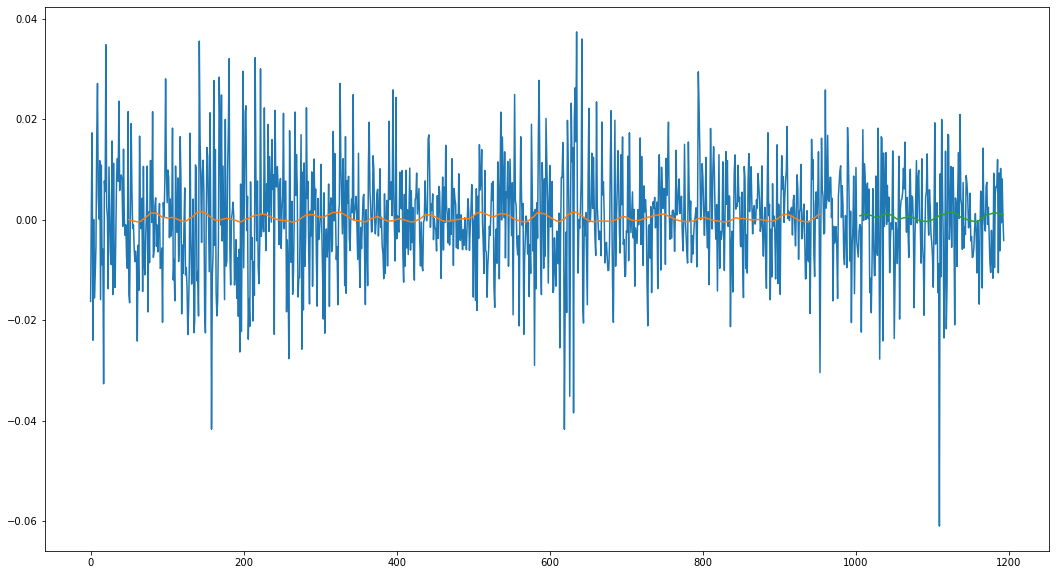

In [45]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot((df3))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

In [46]:
len(train_data),len(test_data)

(955, 239)

In [47]:
time_stamp = 50
var = len(test_data)-time_stamp
x_input = test_data[var:].reshape(1,-1)
x_input.shape

(1, 50)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.05807001]
51


In [50]:
lst_output = scaler.inverse_transform(lst_output)

In [51]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df3)

1194

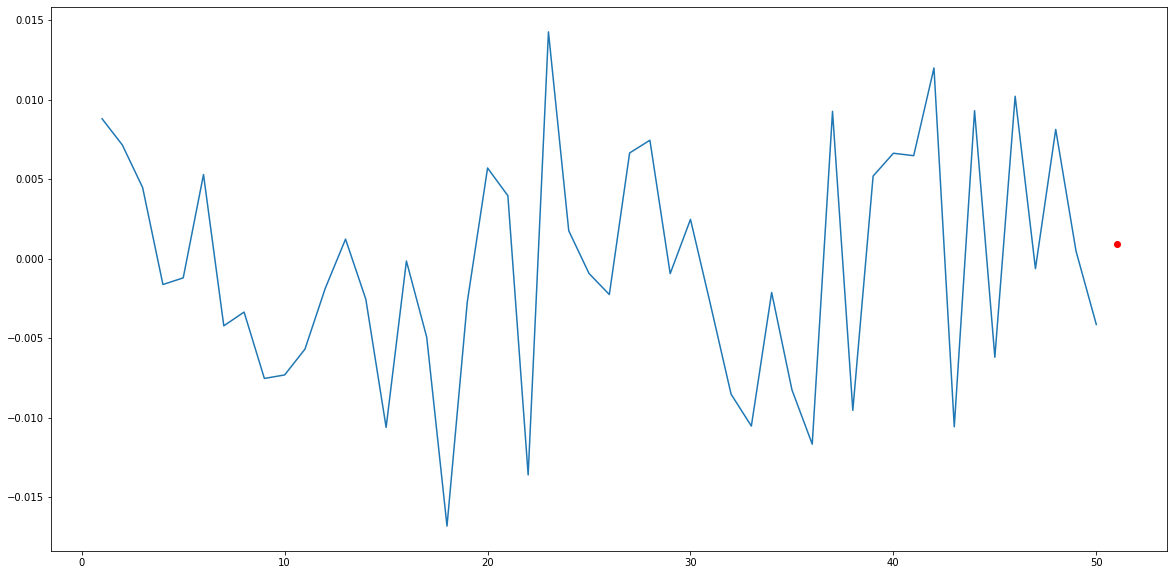

In [54]:
var_1 = len(df3)-time_stamp
plt.figure(figsize = (20,10))
plt.plot(day_new,(df3[var_1:]))
plt.scatter(day_pred,(lst_output), c = "r")

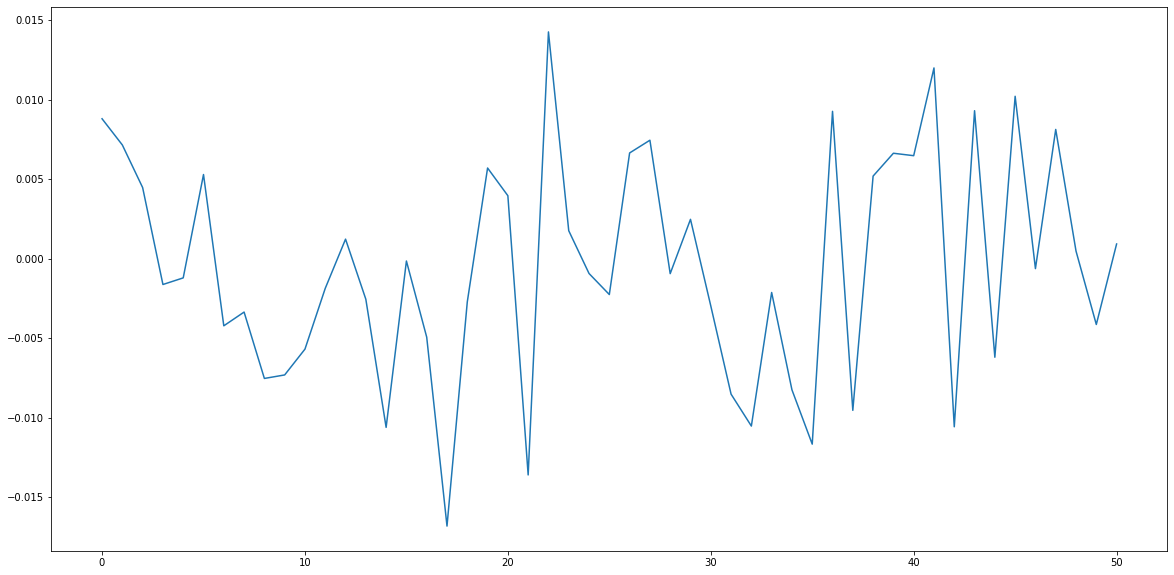

In [55]:
plt.figure(figsize = (20,10))
df3 = df3.tolist()
df3.extend((lst_output))
plt.plot((df3[var_1:]))

In [56]:
check_df = yf.download('^NSEI',start="2015-12-01", end="2016-01-03",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [57]:
check_df["Close"].tail(10)

Date
2015-12-17 00:00:00+05:30    7844.350098
2015-12-18 00:00:00+05:30    7761.950195
2015-12-21 00:00:00+05:30    7834.450195
2015-12-22 00:00:00+05:30    7786.100098
2015-12-23 00:00:00+05:30    7865.950195
2015-12-24 00:00:00+05:30    7861.049805
2015-12-28 00:00:00+05:30    7925.149902
2015-12-29 00:00:00+05:30    7928.950195
2015-12-30 00:00:00+05:30    7896.250000
2015-12-31 00:00:00+05:30    7946.350098
Name: Close, dtype: float64

In [58]:
check_df.to_csv("^GSPC_check.csv")

In [59]:
check_df = pd.read_csv("^GSPC_check.csv")

In [60]:
check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       22 non-null     object 
 1   Open       22 non-null     float64
 2   High       22 non-null     float64
 3   Low        22 non-null     float64
 4   Close      22 non-null     float64
 5   Adj Close  22 non-null     float64
 6   Volume     22 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [61]:
check_df["Date"] = pd.to_datetime(check_df["Date"])

In [62]:
check_df = check_df.set_index("Date")

In [63]:
check_df["Return"] = check_df.Close.pct_change()

In [64]:
check_df1 = check_df["Return"].dropna()
check_df1,df1[1425:]

(Date
 2015-12-02 00:00:00+05:30   -0.002960
 2015-12-03 00:00:00+05:30   -0.008473
 2015-12-04 00:00:00+05:30   -0.010459
 2015-12-07 00:00:00+05:30   -0.002120
 2015-12-08 00:00:00+05:30   -0.008203
 2015-12-09 00:00:00+05:30   -0.011582
 2015-12-10 00:00:00+05:30    0.009300
 2015-12-11 00:00:00+05:30   -0.009482
 2015-12-14 00:00:00+05:30    0.005203
 2015-12-15 00:00:00+05:30    0.006647
 2015-12-16 00:00:00+05:30    0.006493
 2015-12-17 00:00:00+05:30    0.012057
 2015-12-18 00:00:00+05:30   -0.010504
 2015-12-21 00:00:00+05:30    0.009340
 2015-12-22 00:00:00+05:30   -0.006171
 2015-12-23 00:00:00+05:30    0.010255
 2015-12-24 00:00:00+05:30   -0.000623
 2015-12-28 00:00:00+05:30    0.008154
 2015-12-29 00:00:00+05:30    0.000480
 2015-12-30 00:00:00+05:30   -0.004124
 2015-12-31 00:00:00+05:30    0.006345
 Name: Return, dtype: float64,
 Empty DataFrame
 Columns: [Close, Return, Log_Return]
 Index: [])

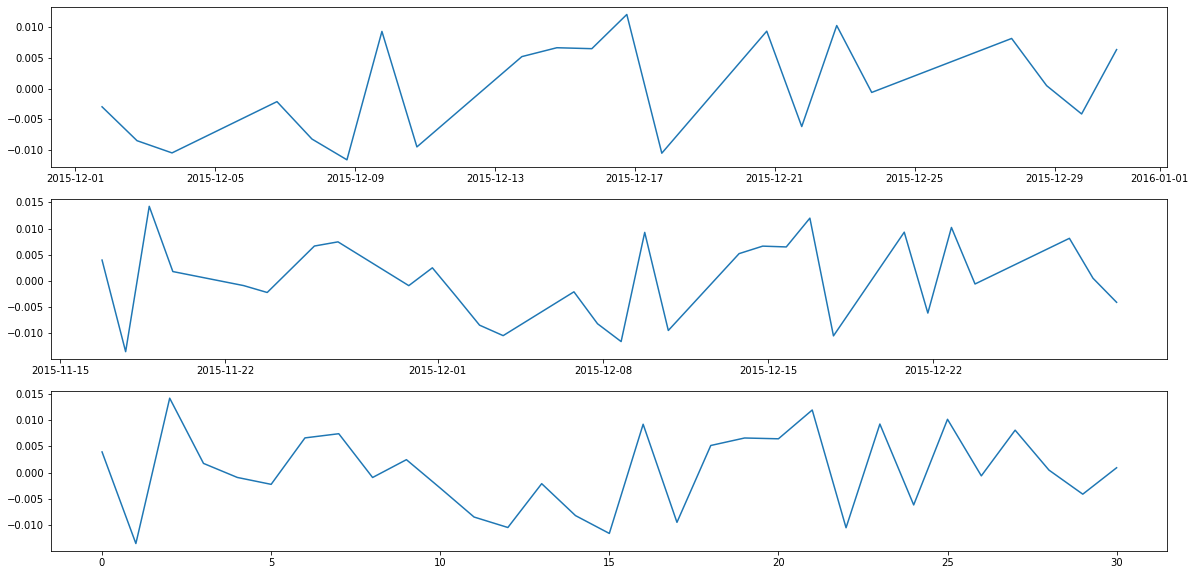

In [65]:
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
plt.plot(check_df1);
plt.subplot(3,1,2)
plt.plot(df2[var_1+20:])
plt.subplot(3,1,3)
plt.plot((df3[var_1+20:]))